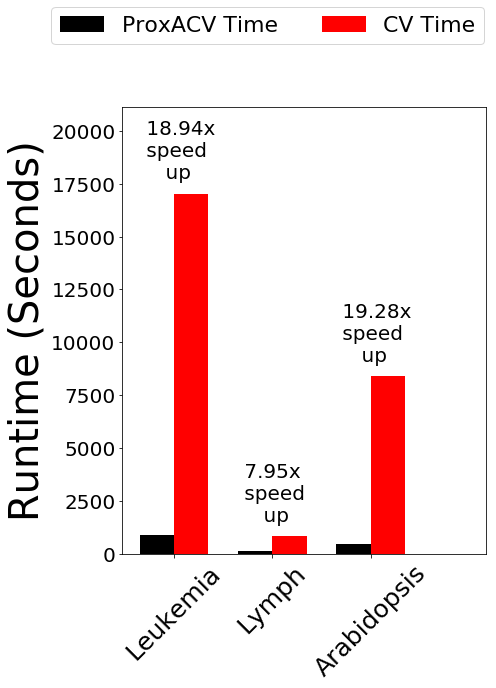

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import interactive
import matplotlib.font_manager as font_manager
from matplotlib.backends.backend_pdf import PdfPages


fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(111)
font = font_manager.FontProperties(family='Times New Roman', size = 20)
font2 = font_manager.FontProperties(family='normal', size = 22)


## The data
#The tables contain the following four values [ACV Error, CV Errors, ACV Time, CV Time] 
Leukemia_lam25 = [509.9442, 616.9676, 172.2030, 2.4211e4]
#Leukemia_lam50 = [1.0382e3, 1.0576e3, 178.9190,5.7624e3] 
Leukemia_lam50 = [1.0310e3, 1.0576e3, 899.2430,1.7032e4] #13 iterations
Leukemia_lam75 = [1.4171e3, 1.4196e3, 96.1560, 368.6910]
Leukemia_lam100 = [1.4969e3, 1.4983e3, 58.3270, 1.6556e3]

Lymph_lam25 = [358.1757, 364.7783, 463.1240, 3.7547e3]
#Lymph_lam50 = [573.5888, 574.0428, 31.1240, 388.6130] 
Lymph_lam50 = [572.6062, 574.0428, 103.7380, 824.2540] #10 iterations, 24 workers
Lymph_lam75 = [656.3535,656.8265, 33.5110,159.0450]
Lymph_lam100 = [700.6269, 700.7865, 17.7070, 473.8270]

Arabidopsis_lam25 = [238.9448, 268.0520, 1.2300e3, 1.3460e4]
#Arabidopsis_lam50 = [619.1302, 625.2355, 104.0560, 3.1114e3] 
Arabidopsis_lam50 = [616.3337, 625.2355, 435.8960, 8.4035e3] # 12 iterations
Arabidopsis_lam75 = [915.6893, 917.9420, 86.8510,442.1190]
Arabidopsis_lam100 = [995.8183, 996.2768, 41.6180,915.2070]

# Time plots  
## the bars
width = 0.35 
ind = np.arange(3)
lambdavalues = [.25,.5,.75,1]
csfont = {'fontname':'normal'}


#Leukemia
LeukemiaACVTime = [Leukemia_lam25[2], Leukemia_lam50[2], Leukemia_lam75[2],Leukemia_lam100[2]]
LeukemiaCVTime = [Leukemia_lam25[3], Leukemia_lam50[3], Leukemia_lam75[3],Leukemia_lam100[3]]
SpeedUpLeukemia = [LeukemiaCVTime[i]/LeukemiaACVTime[i] for i in ind]

#LymphPlot
LymphACVTime = [Lymph_lam25[2], Lymph_lam50[2], Lymph_lam75[2],Lymph_lam100[2]]
LymphCVTime = [Lymph_lam25[3], Lymph_lam50[3], Lymph_lam75[3],Lymph_lam100[3]]
SpeedUpLymph = [LymphCVTime[i]/LymphACVTime[i] for i in ind]

ArabidopsisACVTime = [Arabidopsis_lam25[2], Arabidopsis_lam50[2], Arabidopsis_lam75[2],Arabidopsis_lam100[2]]
ArabidopsisCVTime = [Arabidopsis_lam25[3], Arabidopsis_lam50[3], Arabidopsis_lam75[3],Arabidopsis_lam100[3]]
SpeedUpArabidopsis = [ArabidopsisCVTime[i]/ArabidopsisACVTime[i] for i in ind]

ACVTimes50 = [Leukemia_lam50[2], Lymph_lam50[2],  Arabidopsis_lam50[2]]
CVTimes50 =  [Leukemia_lam50[3], Lymph_lam50[3],  Arabidopsis_lam50[3]]
SpeedUps50 = [SpeedUpLeukemia[1],SpeedUpLymph[1], SpeedUpArabidopsis[1]]

SpeedUps50[1]
###ACV
rects1 = ax.bar(ind,ACVTimes50, width,
                color='black')
                #error_kw=dict(elinewidth=2,ecolor='red'))
###CV
rects2 = ax.bar(ind+width,CVTimes50 , width,
                    color='red')
                    #yerr=womenStd,
                    #error_kw=dict(elinewidth=2,ecolor='black'))

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,2.1120e4)
plt.yticks(size = 20)


ax.set_ylabel('Runtime (Seconds)', fontsize = 40, **csfont)
#ax.set_title('Leukemia', fontsize = 30, **csfont)
xTickMarks = ['Leukemia', 'Lymph', 'Arabidopsis' ]#['$\lambda$ = '+str(i) for i in lambdavalues]
ax.set_xticks(ind+width/2)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=25,**csfont)
for i in ind:
    ax.text(i -width/2, CVTimes50[i]+700, ' '+str(round(SpeedUps50[i],2))+'x \n speed\n    up', color='black', fontsize = 20)

plt.legend((rects1[0], rects2[0]), ('ProxACV Time', 'CV Time'),loc='upper center', bbox_to_anchor=(.4, 1.25),
          ncol=4, fancybox=True, shadow=False, fontsize=50,labelspacing=1, prop = font2)

## make plots
plt.tight_layout()
#prop = font, fontsize=30)
fig.show()
pp = PdfPages('time_plot_bydataset.pdf')
pp.savefig(fig)
pp.close()
#fig.savefig("time_plot.pdf", bbox_inches='tight')



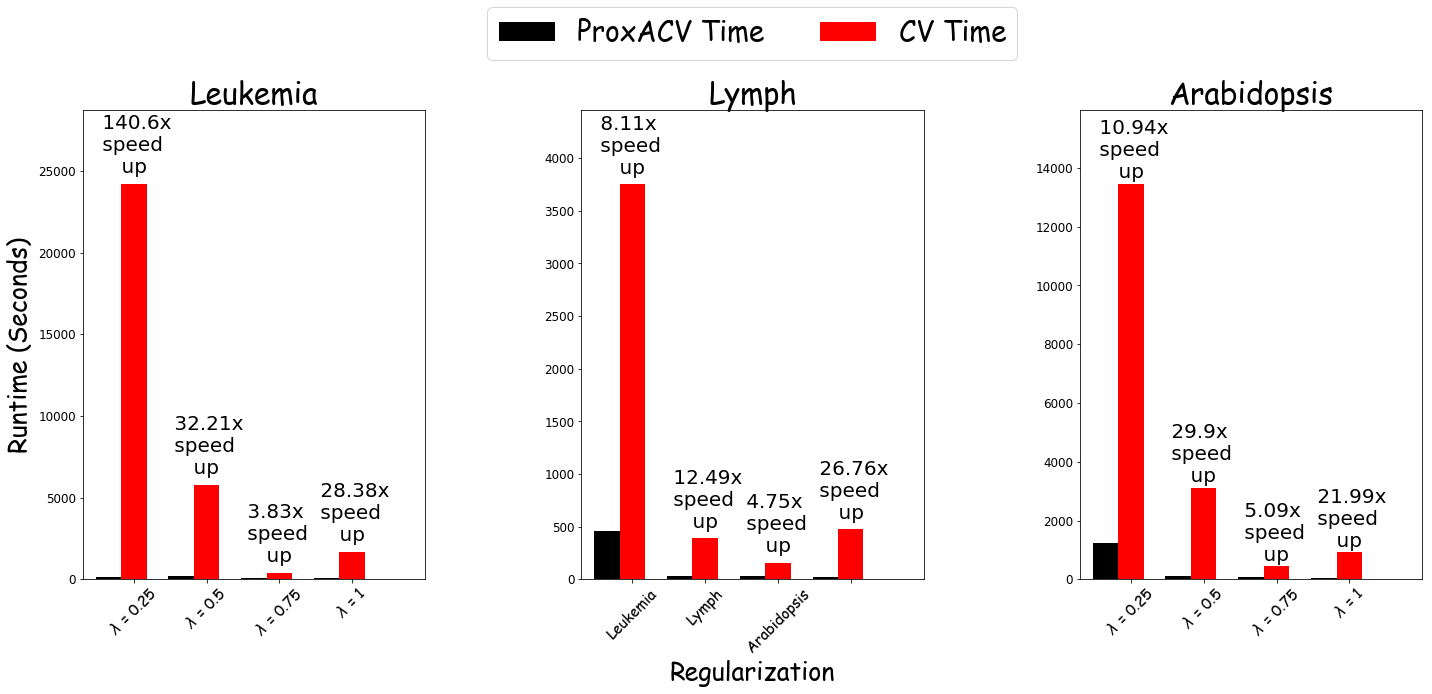

In [10]:
#############OLD PLOT CODE
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import interactive
import matplotlib.font_manager as font_manager
from matplotlib.backends.backend_pdf import PdfPages


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(131)
font = font_manager.FontProperties(family='Comic Sans MS', size = 20)
font2 = font_manager.FontProperties(family='Comic Sans MS', size = 28)


## The data
#The tables contain the following four values [ACV Error, CV Errors, ACV Time, CV Time] 
Leukemia_lam25 = [509.9442, 616.9676, 172.2030, 2.4211e4]
Leukemia_lam50 = [1.0382e3, 1.0576e3, 178.9190,5.7624e3]
Leukemia_lam75 = [1.4171e3, 1.4196e3, 96.1560, 368.6910]
Leukemia_lam100 = [1.4969e3, 1.4983e3, 58.3270, 1.6556e3]

Lymph_lam25 = [358.1757, 364.7783, 463.1240, 3.7547e3]
Lymph_lam50 = [573.5888, 574.0428, 31.1240, 388.6130]
Lymph_lam75 = [656.3535,656.8265, 33.5110,159.0450]
Lymph_lam100 = [700.6269, 700.7865, 17.7070, 473.8270]

Arabidopsis_lam25 = [238.9448, 268.0520, 1.2300e3, 1.3460e4]
Arabidopsis_lam50 = [619.1302, 625.2355, 104.0560, 3.1114e3]
Arabidopsis_lam75 = [915.6893, 917.9420, 86.8510,442.1190]
Arabidopsis_lam100 = [995.8183, 996.2768, 41.6180,915.2070]

# Time plots  
## the bars
width = 0.35 
ind = np.arange(4)
lambdavalues = [.25,.5,.75,1]
csfont = {'fontname':'Comic Sans MS'}


#Leukemia
LeukemiaACVTime = [Leukemia_lam25[2], Leukemia_lam50[2], Leukemia_lam75[2],Leukemia_lam100[2]]
LeukemiaCVTime = [Leukemia_lam25[3], Leukemia_lam50[3], Leukemia_lam75[3],Leukemia_lam100[3]]
SpeedUpLeukemia = [LeukemiaCVTime[i]/LeukemiaACVTime[i] for i in ind]

###ACV
rects1 = ax.bar(ind,LeukemiaACVTime, width,
                color='black')
                #error_kw=dict(elinewidth=2,ecolor='red'))
###CV
rects2 = ax.bar(ind+width,LeukemiaCVTime , width,
                    color='red')
                    #yerr=womenStd,
                    #error_kw=dict(elinewidth=2,ecolor='black'))

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,2.4211e4+4500)
plt.yticks(size = 12)


ax.set_ylabel('Runtime (Seconds)', fontsize = 25, **csfont)
ax.set_title('Leukemia', fontsize = 30, **csfont)
xTickMarks = ['$\lambda$ = '+str(i) for i in lambdavalues]
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=15,**csfont)
for i in ind:
    ax.text(i -width/2, LeukemiaCVTime[i]+700, ' '+str(round(SpeedUpLeukemia[i],2))+'x \n speed\n    up', color='black', fontsize = 20)



## NEW PLOT
ax1 = fig.add_subplot(132)


#LymphPlot
LymphACVTime = [Lymph_lam25[2], Lymph_lam50[2], Lymph_lam75[2],Lymph_lam100[2]]
LymphCVTime = [Lymph_lam25[3], Lymph_lam50[3], Lymph_lam75[3],Lymph_lam100[3]]
SpeedUpLymph = [LymphCVTime[i]/LymphACVTime[i] for i in ind]

###ACV
rects1_Ly = ax1.bar(ind,LymphACVTime, width,
                color='black')
                #error_kw=dict(elinewidth=2,ecolor='red'))
###CV
rects2_Ly = ax1.bar(ind+width,LymphCVTime, width,
                    color='red')
                    #yerr=womenStd,
                    #error_kw=dict(elinewidth=2,ecolor='black'))
# axes and labels
ax1.set_xlim(-width,len(ind)+width)
ax1.set_ylim(0,3.7547e3+700)
plt.yticks(size = 12)



params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
          #'legend.fontname':'Comic Sans MS'}

#ax1.set_ylabel('Seconds')
ax1.set_title('Lymph',fontsize = 30,**csfont)
xTickMarks = ['Leukemia', 'Lymph', 'Arabidopsis' ]
ax1.set_xticks(ind+width)
x1tickNames = ax1.set_xticklabels(xTickMarks)
plt.setp(x1tickNames, rotation=45, fontsize=15,**csfont)
ax1.set_xlabel('Regularization', fontsize = 25, **csfont)


for i in ind:
    ax1.text(i -width/2, LymphCVTime[i]+100, ' '+str(round(SpeedUpLymph[i],2))+'x \n speed\n    up', color='black', fontsize = 20
      )#, sep = \n)
plt.legend((rects1_Ly[0], rects2_Ly[0]), ('ProxACV Time', 'CV Time'),loc='upper center', bbox_to_anchor=(.5, 1.25),
          ncol=3, fancybox=True, shadow=False, fontsize=50,labelspacing=1, prop = font2)
#fig.suptitle('Timing Experiements')

## add a legend
#, handlelength=3, handleheight=3)
#plt.legend(fontsize=20)


# Arabidopsis Plot
ax2 = fig.add_subplot(133)
ArabidopsisACVTime = [Arabidopsis_lam25[2], Arabidopsis_lam50[2], Arabidopsis_lam75[2],Arabidopsis_lam100[2]]
ArabidopsisCVTime = [Arabidopsis_lam25[3], Arabidopsis_lam50[3], Arabidopsis_lam75[3],Arabidopsis_lam100[3]]
SpeedUpArabidopsis = [ArabidopsisCVTime[i]/ArabidopsisACVTime[i] for i in ind]

###ACV
rects1_Arabidopsis = ax2.bar(ind,ArabidopsisACVTime, width,
                color='black')
                #error_kw=dict(elinewidth=2,ecolor='red'))
###CV
rects2_Arabidopsis = ax2.bar(ind+width,ArabidopsisCVTime, width,
                    color='red')
                    #yerr=womenStd,
                    #error_kw=dict(elinewidth=2,ecolor='black'))
# axes and labels
ax2.set_xlim(-width,len(ind)+width)
ax2.set_ylim(0,1.3460e4+2500)
plt.yticks(size = 12)




#ax1.set_ylabel('Seconds')
ax2.set_title('Arabidopsis',fontsize = 30,**csfont)
xTickMarks = ['$\lambda$ = '+str(i) for i in lambdavalues]
ax2.set_xticks(ind+width)
x2tickNames = ax2.set_xticklabels(xTickMarks)
plt.setp(x2tickNames, rotation=45, fontsize=15,**csfont)
for i in ind:
    ax2.text(i -width/2, ArabidopsisCVTime[i]+200, ' '+str(round(SpeedUpArabidopsis[i],2))+'x \n speed\n    up', color='black', fontsize = 20
      )#, sep = \n)

## add a legend
#ax2.legend((rects1_Arabidopsis[0], rects2_Arabidopsis[0]), ('ProxACV Time', 'CV Time'),loc='upper center', bbox_to_anchor=(0.5, 1.45),
#          ncol=3, fancybox=True, shadow=True, prop = font)



## make plots
plt.tight_layout()
#prop = font, fontsize=30)
fig.show()
pp = PdfPages('time_plot.pdf')
pp.savefig(fig)
pp.close()
#fig.savefig("time_plot.pdf", bbox_inches='tight')




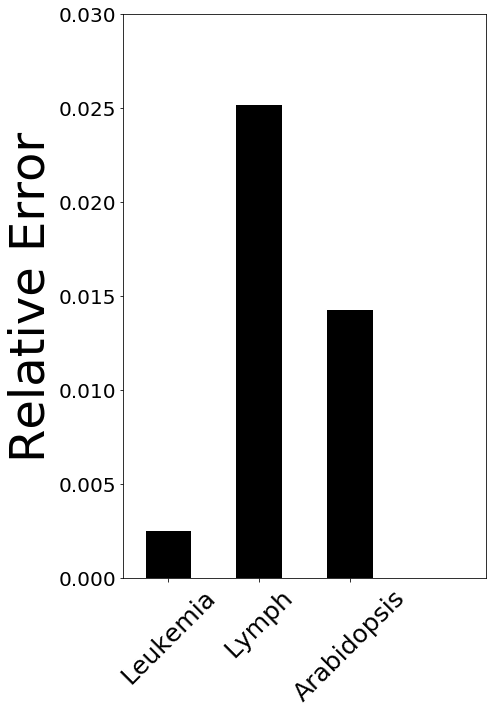

In [10]:
fig3 = plt.figure(figsize=(7,10))
axes = fig3.add_subplot(111)
font = font_manager.FontProperties(family='Times New Roman', size = 20)
font2 = font_manager.FontProperties(family='Times New Roman', size = 20)
barWidth = 0.5 
width = .5


RelativeErrorLymph = [(Lymph_lam25[1] - Lymph_lam25[0])/Lymph_lam25[1], (Lymph_lam50[1] - Lymph_lam50[0])/Lymph_lam50[1], (Lymph_lam75[1] - Lymph_lam75[0])/Lymph_lam75[1],(Lymph_lam100[1] - Lymph_lam100[0])/Lymph_lam100[1]]
RelativeErrorLeukemia = [(Leukemia_lam25[1] - Leukemia_lam25[0])/Leukemia_lam25[1], (Leukemia_lam50[1] - Leukemia_lam50[0])/Leukemia_lam50[1], (Leukemia_lam75[1] - Leukemia_lam75[0])/Leukemia_lam75[1],(Leukemia_lam100[1] - Leukemia_lam100[0])/Leukemia_lam100[1]]
RelativeErrorArabidopsis = [(Arabidopsis_lam25[1] - Arabidopsis_lam25[0])/Arabidopsis_lam25[1], (Arabidopsis_lam50[1] - Arabidopsis_lam50[0])/Arabidopsis_lam50[1], (Arabidopsis_lam75[1] - Arabidopsis_lam75[0])/Arabidopsis_lam75[1],(Arabidopsis_lam100[1] - Arabidopsis_lam100[0])/Arabidopsis_lam100[1]]

RelativeError50 = [RelativeErrorLymph[1], RelativeErrorLeukemia[1], RelativeErrorArabidopsis[1]]
RelativeError50
###ACV
r1 = np.arange(len(RelativeError50))
#rects1 = axes.bar(ind,RelativeErrorLeukemia, width,

 
# Make the plot
###ACV
#rects1 = ax.bar(ind,ACVTime, width,
 #               color='black')
                #error_kw=dict(elinewidth=2,ecolor='red'))
###CV
#rects2 = ax.bar(ind+width,CVTime , width,
#                    color='red')
                    #yerr=womenStd,
                    #error_kw=dict(elinewidth=2,ecolor='black'))


ind = np.arange(3)

        
# axes and labels
axes.set_xlim(-width,len(ind)+width)
axes.set_ylim(0,.03)
axes.set_ylabel('Relative Error',fontsize = 48, **csfont)
#plt.ylabel(size = 30)
#ax.set_title('Leukemia', fontsize = 30, **csfont)
xTickMarks = ['Leukemia', 'Lymph', 'Arabidopsis' ]
#plt.xticks(size = 50)
plt.yticks(size = 20)
#plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])

axes.set_xticks(r1)#[i+1.2*width for i in ind])
xtickNames = axes.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=25,**csfont)
#axes.set_xlabel('Regularization', fontsize = 25, **csfont)

rects1 = axes.bar(ind,[RelativeError50[0],0,0], width,
                color='black')
                #error_kw=dict(elinewidth=2,ecolor='red'))
###CV
rects2 = axes.bar(ind,[0,RelativeError50[1],0] , width,
                    color='black')
rects3 = axes.bar(ind,[0,0, RelativeError50[2]] , width,
                    color='black')

#plt.bar(RelativeError50)
#for i in ind:
#    ax.text(i -width/2, LeukemiaCVTime[i]+700, ' '+str(round(SpeedUpLeukemia[i],2))+' x \n speed\n    up', color='black', fontsize = 20)

#axes.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
 #         ncol=3, fancybox=True, shadow=True, prop = font)
fig3.show()
#plt.legend((rects1[0],rects2[0],rects3[0]) , ('Leukemia', 'Lymph', 'Arabidopsis' ),loc='upper center', bbox_to_anchor=(.5, 1.25),
 #         ncol=3, fancybox=True, shadow=False, fontsize=30,labelspacing=.8, prop = font2)

plt.tight_layout()
#prop = font, fontsize=30)
pp1 = PdfPages('error_plot_bar.pdf')
pp1.savefig(fig3)
pp1.close()
        

In [79]:
RelativeError50

[0.0007908817948767314, 0.018343419062027105, 0.009764800623125297]

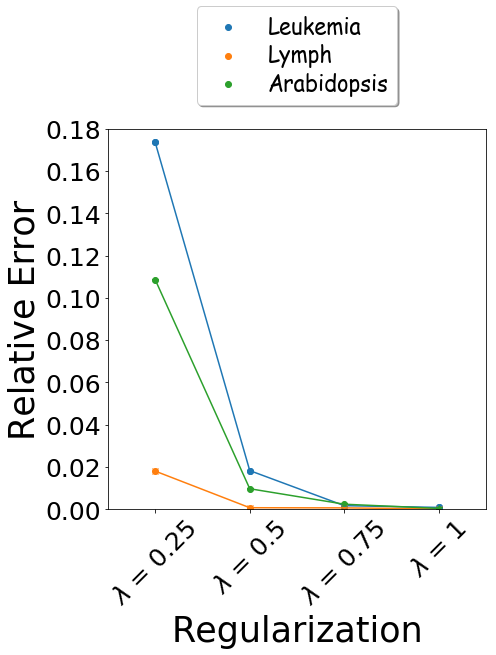

In [18]:
### OLD RELATIVE ERROR PLOT
fig2 = plt.figure(figsize=(7,10))
axes = fig2.add_subplot(111)
font = font_manager.FontProperties(family='Comic Sans MS', size = 22)
barWidth = 0.5 
width = .5


RelativeErrorLymph = [(Lymph_lam25[1] - Lymph_lam25[0])/Lymph_lam25[1], (Lymph_lam50[1] - Lymph_lam50[0])/Lymph_lam50[1], (Lymph_lam75[1] - Lymph_lam75[0])/Lymph_lam75[1],(Lymph_lam100[1] - Lymph_lam100[0])/Lymph_lam100[1]]
RelativeErrorLeukemia = [(Leukemia_lam25[1] - Leukemia_lam25[0])/Leukemia_lam25[1], (Leukemia_lam50[1] - Leukemia_lam50[0])/Leukemia_lam50[1], (Leukemia_lam75[1] - Leukemia_lam75[0])/Leukemia_lam75[1],(Leukemia_lam100[1] - Leukemia_lam100[0])/Leukemia_lam100[1]]
RelativeErrorArabidopsis = [(Arabidopsis_lam25[1] - Arabidopsis_lam25[0])/Arabidopsis_lam25[1], (Arabidopsis_lam50[1] - Arabidopsis_lam50[0])/Arabidopsis_lam50[1], (Arabidopsis_lam75[1] - Arabidopsis_lam75[0])/Arabidopsis_lam75[1],(Arabidopsis_lam100[1] - Arabidopsis_lam100[0])/Arabidopsis_lam100[1]]


###ACV
r1 = np.arange(len(RelativeErrorLymph))
#rects1 = axes.bar(ind,RelativeErrorLeukemia, width,
#color='black')
                #error_kw=dict(elinewidth=2,ecolor='red'))
###CV
#r2 = [x + width for x in r1]
#rects2 = axes.bar(r2,RelativeErrorLymph, width,
#                    color='red')
                    #yerr=womenStd,
                    #error_kw=dict(elinewidth=2,ecolor='black'))
#rects3 = axes.bar([x + width for x in r2],RelativeErrorArabidopsis, width,
#                    color='green')
                    #yerr=womenStd,
                    #error_kw=dict(elinewidth=2,ecolor='black'))

        
#
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
 
# Make the plot
plt.scatter(r1, RelativeErrorLeukemia, label='Leukemia')#, '-o')#, width=barWidth, edgecolor='white', label='Leukemia')
plt.scatter(r1, RelativeErrorLymph,label='Lymph')# '-x')#, width=barWidth, edgecolor='white', label='Lymph')
plt.scatter(r1, RelativeErrorArabidopsis,label='Arabidopsis')#,'-*' )#, width=barWidth, edgecolor='white', label='Arabidopsis')
plt.plot(r1, RelativeErrorLeukemia,'-o')
plt.plot(r1, RelativeErrorLymph,'-x')
plt.plot(r1, RelativeErrorArabidopsis,'-*' )
        
# axes and labels
axes.set_xlim(-width,len(ind)+width)
axes.set_ylim(0,.18)
axes.set_ylabel('Relative Error',fontsize = 35, **csfont)
#plt.ylabel(size = 30)
#ax.set_title('Leukemia', fontsize = 30, **csfont)
xTickMarks = ['$\lambda$ = '+str(i) for i in lambdavalues]
#plt.xticks(size = 50)
plt.yticks(size = 25)
#plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])

axes.set_xticks(r1)#[i+1.2*width for i in ind])
xtickNames = axes.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=25,**csfont)
axes.set_xlabel('Regularization', fontsize = 35, **csfont)



#for i in ind:
#    ax.text(i -width/2, LeukemiaCVTime[i]+700, ' '+str(round(SpeedUpLeukemia[i],2))+' x \n speed\n    up', color='black', fontsize = 20)

axes.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35),
          ncol=1, fancybox=True, labelspacing=.2, shadow=True, prop = font)
fig2.show()


plt.tight_layout()
#prop = font, fontsize=30)
pp1 = PdfPages('error_plot_lam.pdf')
pp1.savefig(fig2)
pp1.close()
        